In [1]:
library(datasets)
library(tidyverse, quietly = TRUE, verbose = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Títulos y etiquetas

In [2]:
p <- ggplot(mtcars, aes(mpg, wt, colour = cyl)) + geom_point()
p <- p + labs(colour = "Cylinders")
p

In [3]:
p <- p + labs(x = "New x label") +
  labs(title = "New plot title", subtitle = "A subtitle") +
  labs(caption = "(based on data from ...)")
p

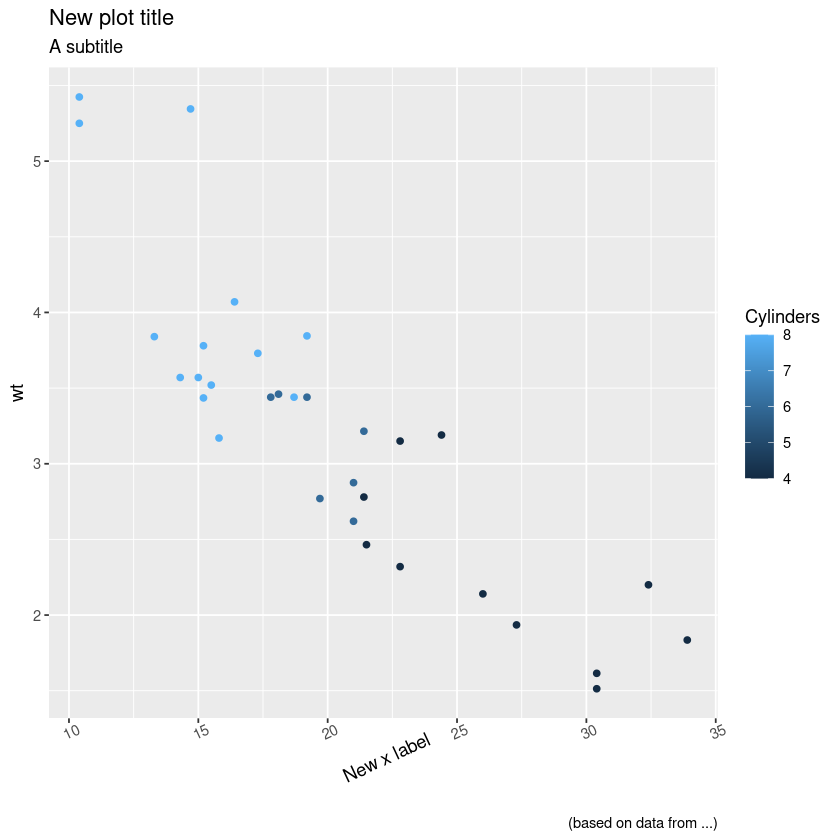

In [4]:
p <- p + theme(axis.title.x = element_text(angle = 25), axis.text.x =  element_text(angle =25))
p

# Exportar gráficos

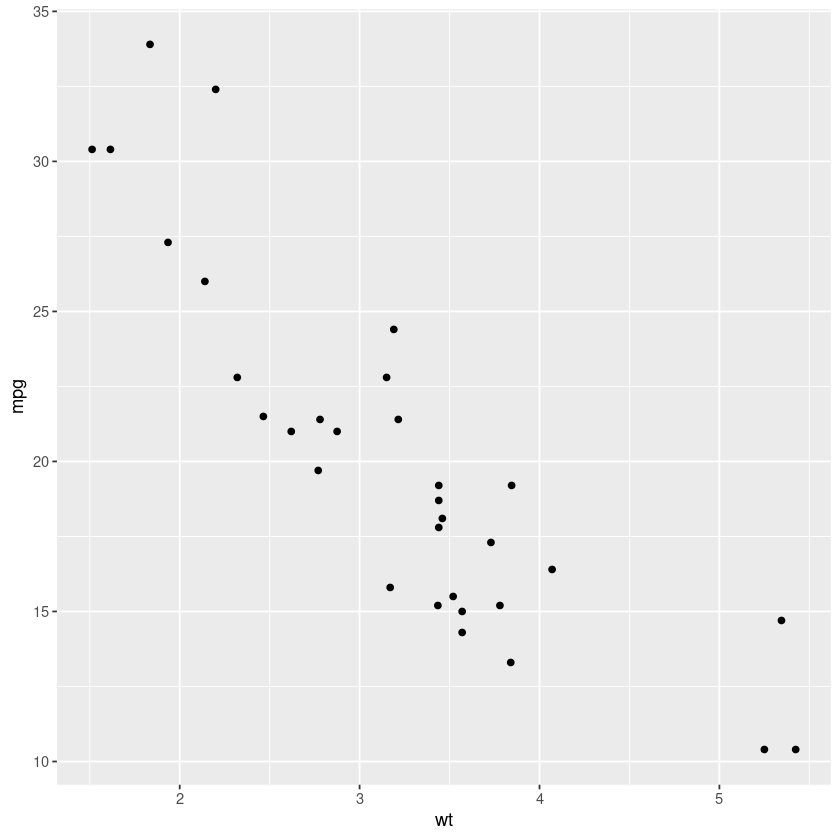

In [5]:
plot1 <- ggplot(mtcars, aes(wt, mpg)) + geom_point()

plot2 <- ggplot(mtcars, aes(factor(cyl), mpg)) + geom_boxplot()

plot1

In [8]:
png("plot1.png")
print(plot1)
dev.off()

png 
  2

In [9]:
pdf("plot2.pdf")
print(plot2)
dev.off()

png 
  2

Alternativa: https://ggplot2.tidyverse.org/reference/ggsave.html

# Múltiples gráficos

In [10]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Hacemos una lista de los argumentos y plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  #Si no se recibe el parámetro de layout se usará 'cols' para determinarlo
  if (is.null(layout)) {
    # Se crea el panel
    # ncol: Número de columnas de plots
    # nrow: Número de filas, se calcula basado en ncol
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    #Creamos la página
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Colocamos cada plot en la posición adecuada
    for (i in 1:numPlots) {
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

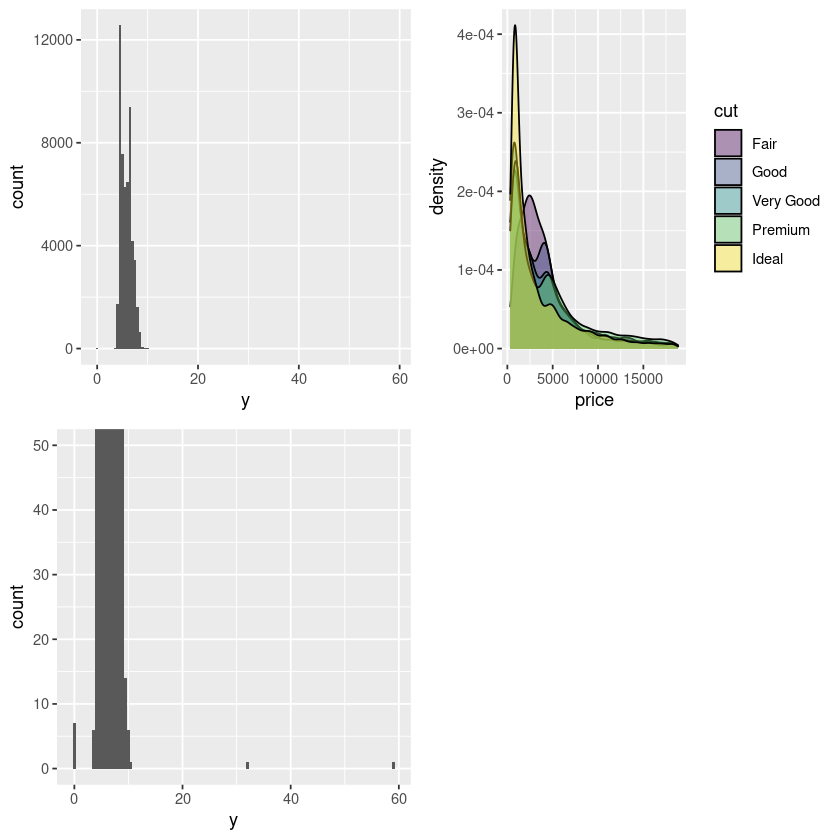

In [11]:
p1 <- ggplot(diamonds) + geom_histogram(mapping = aes(x = y), binwidth = 0.5)
p2 <- ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))
p3 <- ggplot(diamonds, aes(x = price, fill = cut)) +
  geom_density(alpha = 0.4)
multiplot(p1, p2, p3, cols = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


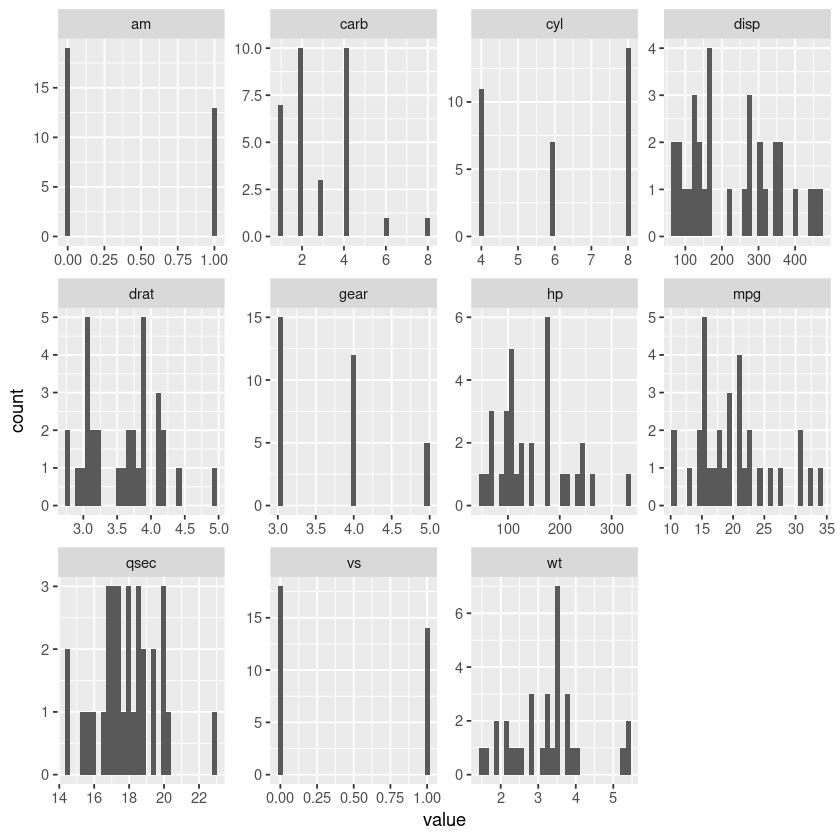

In [14]:
mtcars %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

In [16]:
mtcars

mpg  cyl disp  hp  drat wt    qsec  vs am gear carb
Mazda RX4           21.0 6   160.0 110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag       21.0 6   160.0 110 3.90 2.875 17.02 0  1  4    4   
Datsun 710          22.8 4   108.0  93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive      21.4 6   258.0 110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout   18.7 8   360.0 175 3.15 3.440 17.02 0  0  3    2   
Valiant             18.1 6   225.0 105 2.76 3.460 20.22 1  0  3    1   
Duster 360          14.3 8   360.0 245 3.21 3.570 15.84 0  0  3    4   
Merc 240D           24.4 4   146.7  62 3.69 3.190 20.00 1  0  4    2   
Merc 230            22.8 4   140.8  95 3.92 3.150 22.90 1  0  4    2   
Merc 280            19.2 6   167.6 123 3.92 3.440 18.30 1  0  4    4   
Merc 280C           17.8 6   167.6 123 3.92 3.440 18.90 1  0  4    4   
Merc 450SE          16.4 8   275.8 180 3.07 4.070 17.40 0  0  3    3   
Merc 450SL          17.3 8   275.8 180 3.07 3.730 17.60 0  0  3    3   
Merc 450SLC         15.2 8   275.8 180 3.07 3.780 18.00 0  0  3    3   
Cadillac Fleetwood  10.4 8   472.0 205 2.93 5.250 17.98 0  0  3    4   
Lincoln Continental 10.4 8   460.0 215 3.00 5.424 17.82 0  0  3    4   
Chrysler Imperial   14.7 8   440.0 230 3.23 5.345 17.42 0  0  3    4   
Fiat 128            32.4 4    78.7  66 4.08 2.200 19.47 1  1  4    1   
Honda Civic         30.4 4    75.7  52 4.93 1.615 18.52 1  1  4    2   
Toyota Corolla      33.9 4    71.1  65 4.22 1.835 19.90 1  1  4    1   
Toyota Corona       21.5 4   120.1  97 3.70 2.465 20.01 1  0  3    1   
Dodge Challenger    15.5 8   318.0 150 2.76 3.520 16.87 0  0  3    2   
AMC Javelin         15.2 8   304.0 150 3.15 3.435 17.30 0  0  3    2   
Camaro Z28          13.3 8   350.0 245 3.73 3.840 15.41 0  0  3    4   
Pontiac Firebird    19.2 8   400.0 175 3.08 3.845 17.05 0  0  3    2   
Fiat X1-9           27.3 4    79.0  66 4.08 1.935 18.90 1  1  4    1   
Porsche 914-2       26.0 4   120.3  91 4.43 2.140 16.70 0  1  5    2   
Lotus Europa        30.4 4    95.1 113 3.77 1.513 16.90 1  1  5    2   
Ford Pantera L      15.8 8   351.0 264 4.22 3.170 14.50 0  1  5    4   
Ferrari Dino        19.7 6   145.0 175 3.62 2.770 15.50 0  1  5    6   
Maserati Bora       15.0 8   301.0 335 3.54 3.570 14.60 0  1  5    8   
Volvo 142E          21.4 4   121.0 109 4.11 2.780 18.60 1  1  4    2

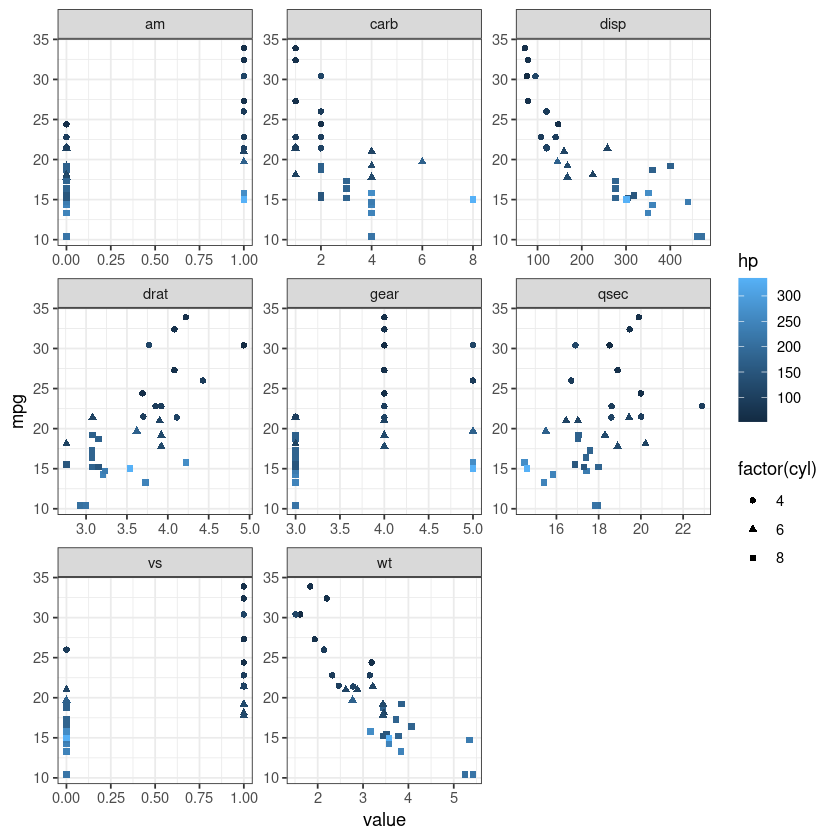

In [17]:
mtcars %>%
  gather(-mpg, -hp, -cyl, key = "var", value = "value") %>%
  ggplot(aes(x = value, y = mpg, color = hp, shape = factor(cyl))) +
    geom_point() +
    facet_wrap(~ var, scales = "free") +
    theme_bw()

In [18]:
p3 <- mtcars %>%
  gather(-mpg, key = "var", value = "value") %>%
  ggplot(aes(x = value, y = mpg)) +
    geom_point() +
    stat_smooth() +
    facet_wrap(~ var, scales = "free") +
    theme_bw()

p3

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.005”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.01”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.005”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 1.005”Warning message in predLoess(obje

Aquí información sobre gather: https://tidyr.tidyverse.org/reference/gather.html

# Gradientes

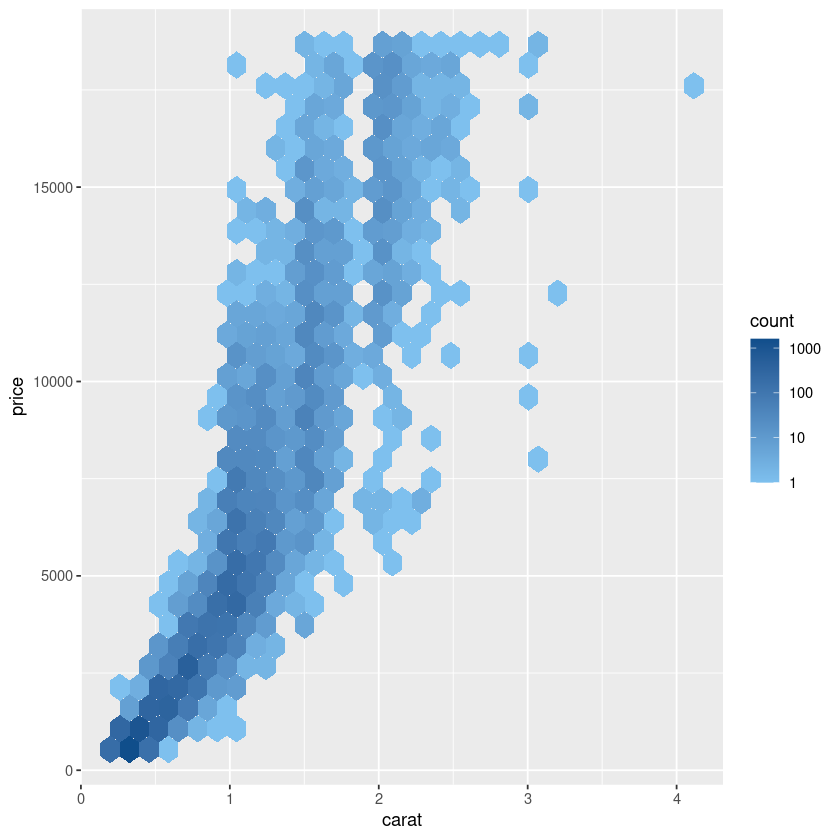

In [21]:
library(datasets)
small <- diamonds[sample(nrow(diamonds),10000),]

# install.packages("hexbin")
ggplot(data = small) +
  geom_hex(mapping = aes(x = carat, y = price)) + 
  scale_fill_gradient(low = "skyblue2", high = "dodgerblue4", trans="log10")

# Etiquetas

In [23]:
subset(mtcars, wt > 4)

mpg  cyl disp  hp  drat wt    qsec  vs am gear carb
Merc 450SE          16.4 8   275.8 180 3.07 4.070 17.40 0  0  3    3   
Cadillac Fleetwood  10.4 8   472.0 205 2.93 5.250 17.98 0  0  3    4   
Lincoln Continental 10.4 8   460.0 215 3.00 5.424 17.82 0  0  3    4   
Chrysler Imperial   14.7 8   440.0 230 3.23 5.345 17.42 0  0  3    4   
                    car                
Merc 450SE          Merc 450SE         
Cadillac Fleetwood  Cadillac Fleetwood 
Lincoln Continental Lincoln Continental
Chrysler Imperial   Chrysler Imperial

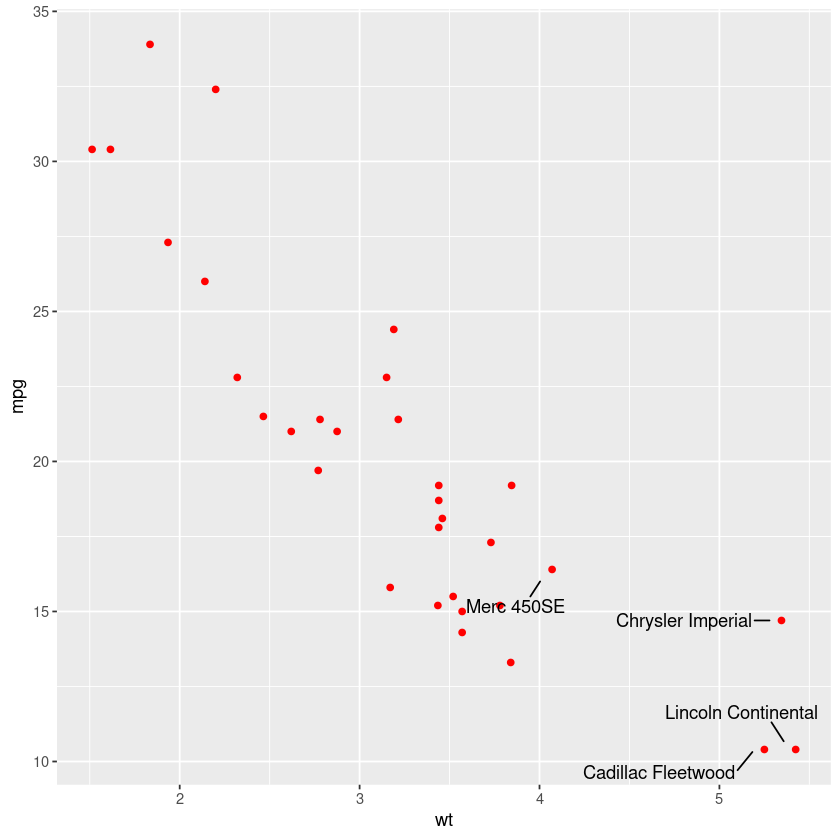

In [28]:
library(ggrepel)

mtcars$car <- rownames(mtcars)

p1 <- ggplot(data = mtcars, mapping = aes(x = wt, y = mpg)) + geom_point(color = "red")
p1 <- p1 + geom_text_repel(data = subset(mtcars, wt > 4), 
                           mapping = aes(label = car), point.padding = 1)
p1

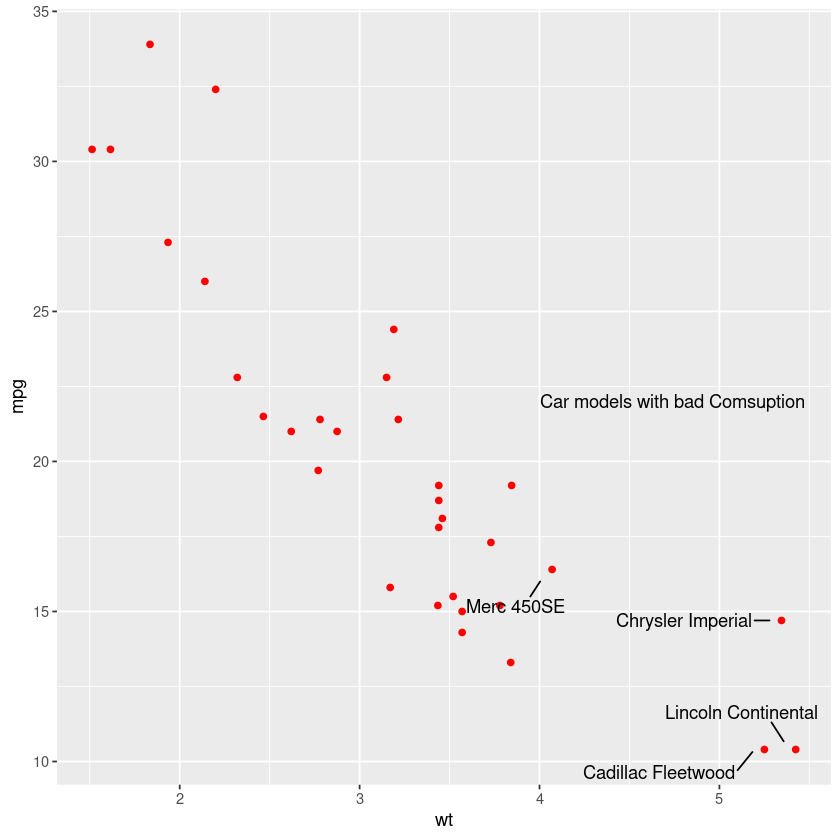

In [29]:
p1 <- p1 + annotate(geom = "text", x = 4, y = 22, label = "Car models with bad Comsuption", hjust = 0)
p1

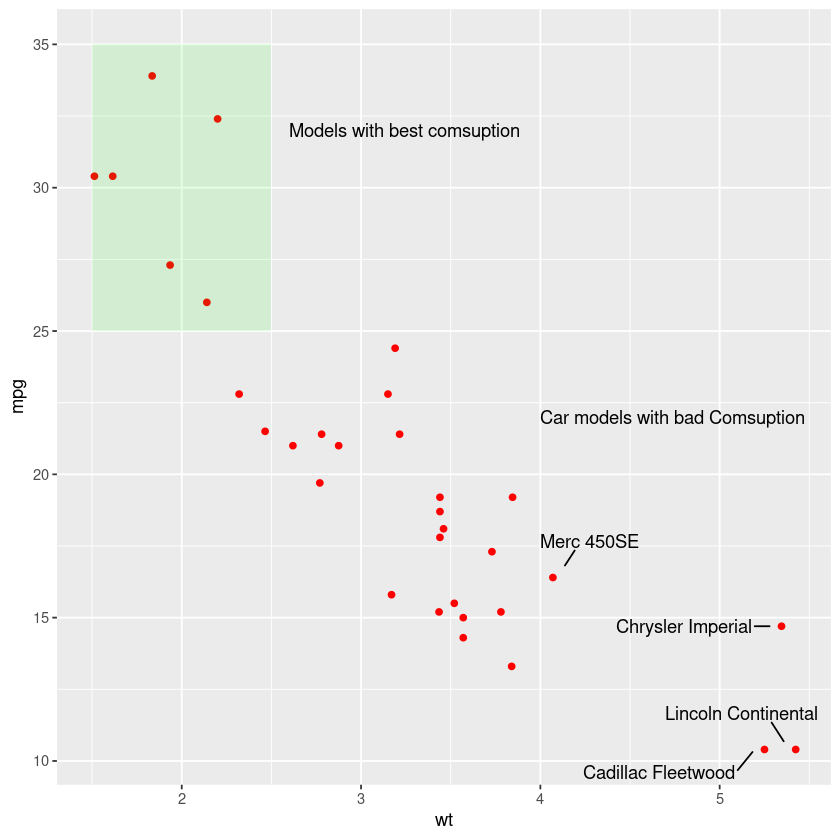

In [30]:
p1 <- p1 + annotate(geom = "rect", xmin = 1.5, xmax = 2.5, ymin = 25, ymax = 35, fill = "green", alpha = 0.1) +
  annotate(geom = "text", x = 2.6, y = 32, label = "Models with best comsuption", hjust = 0)
p1

# Proporciones

In [33]:
LETTERS

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

In [32]:


# Cremos los datos
data <- data.frame(
  group=LETTERS[1:5],
  value=c(13,8,9,21,2)
)

data

group value
1 A     13   
2 B      8   
3 C      9   
4 D     21   
5 E      2

In [ ]:
cumsum(prop)

In [34]:
# Generamos la posición de las etiquetas
data <- data %>% 
  arrange(desc(group)) %>%
  mutate(prop = value / sum(data$value) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )

data


group value prop      ypos     
1 E      2     3.773585  1.886792
2 D     21    39.622642 23.584906
3 C      9    16.981132 51.886792
4 B      8    15.094340 67.924528
5 A     13    24.528302 87.735849

In [37]:
paste(round(3.5, 0), "%")

[1] "4 %"

In [35]:
# Creamos un gráfico de pie
ggplot(data, aes(x="", y=prop, fill=group)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() + 
  theme(legend.position="none") +
  geom_text(aes(y = ypos, label = paste0(round(prop, 0), "%")), color = "white", size=6) +
  scale_fill_brewer(palette="Set1")

In [38]:
ggplot(data, aes(x=group, y=value, fill=group)) + 
  geom_bar(stat="identity") + 
  scale_y_continuous(breaks = seq(0, 25, 2)) +
  scale_fill_brewer(palette = "Set1") 

Aquí información sobre la diferencia entre paste y paste0 https://www.r-bloggers.com/2016/10/difference-between-paste-and-paste0/